<a href="https://colab.research.google.com/github/phutares/SentimentAnalysisHotelReviews/blob/main/Sentiment_Analysis_Hotel_Review_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Operation libraries**

In [ ]:
import pandas as pd 
import numpy as np
import io
import string 

**Import Sentiment Analyzer libraries**

In [ ]:
import nltk
from nltk.corpus import words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#**Import raw data from Web Scraping**

In [ ]:
#อ่านค่าจากไฟล์ csv ลง DataFrame custori
custori = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resultHotel_Original.csv')

#**1. Data Precessing and Sentiment Analyzer**

In [ ]:
#Just Test stopword 
stop_word = set(stopwords.words('english')) 
#-----------------------------------------------------
usefulWord = ['no','not']
stop_words = [w for w in stop_word if w not in usefulWord]
#-----------------------------------------------------
print(stop_words)

['very', 'o', 'what', "isn't", 'doing', 'himself', 'won', 'been', "shan't", 'does', 'and', 'for', "couldn't", "won't", "you'll", 'herself', 'other', 'aren', 'an', 'same', "weren't", "you'd", 'its', 'hadn', 'yours', 'with', 'the', 'doesn', 'him', 'both', "you've", 'his', "haven't", 'most', "she's", 'had', 'm', 'but', 'up', 'weren', 'while', 'was', 'about', 'before', 'haven', "wouldn't", 'ain', 'some', 'am', 'all', 'because', 'between', 'don', 'were', 'them', 'than', 'who', 'again', 'too', 'will', 'isn', "it's", 'is', 'in', 'then', 'we', 'couldn', 'my', 'after', 'there', 'these', 'being', 'has', "aren't", 'ma', 'as', 'their', 'how', "hadn't", 's', 'have', 'having', 'when', 'can', 'whom', 'me', 'any', 'until', "you're", "mightn't", 'mustn', 'you', 'your', 'against', 'themselves', 'she', 'during', 'own', 'yourself', "hasn't", 'by', 'do', 't', 'once', 'll', 'be', 'over', 'wasn', 'few', 'i', 'if', 'of', 'above', 'ourselves', 'that', 'our', "that'll", "mustn't", 'needn', 'y', 'itself', "wasn'

In [ ]:
def isEnglish(name):
    char_set = string.ascii_letters
    return all((True if x in char_set else False for x in name))

In [ ]:
isEnglish("à¸«à¹‰à¸­à¸‡à¸žà¸±à¸à¸”à¸µ à¸ªà¸°à¸­à¸²à¸” à¸ªà¸§à¸¢à¸‡à¸²à¸¡ à¸›à¸£à¸°à¸•à¸¸à¸«à¹‰à¸­à¸‡à¸™à¹‰à¸³à¹€à¸›à¹‡à¸™à¸šà¸²à¸™à¹€à¸¥à¸·à¹ˆà¸­à¸™ à¹à¸•à¹ˆà¸¥à¹‡à¸­à¸„à¹„à¸¡à¹ˆà¹„à¸”à¹‰ à¸ªà¸£à¸°à¸§à¹ˆà¸²à¸¢à¸™à¹‰à¸³ à¸«à¹‰à¸­à¸‡à¸­à¸²à¸«à¸²à¸£+à¸Ÿà¸´à¸•à¹€à¸™à¸ªà¸­à¸¢à¸¹à¹ˆà¸Šà¸±à¹‰à¸™ 6 à¸£à¸±à¸š welcome drink ")

False

In [ ]:
custori.info(null_counts=True)   #ดู info , Check Null Column 
custori.columns = ['rating' ,'checkInDateMonthAndYear','ratingText','reviewComments','reviewNegatives','reviewPositives','reviewTitle'
                  ,'checkInDate','checkOutDate','reviewDate','HotelName','responseText','responseDate'] #แสดงตัวอย่างข้อมูลในไฟล์
custori

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rating                   3498 non-null   float64
 1   checkInDateMonthAndYear  1863 non-null   object 
 2   ratingText               3498 non-null   object 
 3   reviewComments           1833 non-null   object 
 4   reviewNegatives          1258 non-null   object 
 5   reviewPositives          1814 non-null   object 
 6   reviewTitle              3498 non-null   object 
 7   checkInDate              1863 non-null   object 
 8   checkOutDate             1863 non-null   object 
 9   reviewDate               3498 non-null   object 
 10  HotelName                3498 non-null   object 
 11  responseText             426 non-null    object 
 12  responseDate             426 non-null    object 
dtypes: float64(1), object(12)
memory usage: 355.4+ KB


,rating,checkInDateMonthAndYear,ratingText,reviewComments,reviewNegatives,reviewPositives,reviewTitle,checkInDate,checkOutDate,reviewDate,HotelName,responseText,responseDate
0,7.6,กุมภาพันธ์ 2021,ดีมาก,ราคาpromotion ถูกคุ้มค่ามาก,NaN,NaN,Promotionดี,2021-02-28T00:00:00+07:00,2021-03-03T00:00:00+07:00,2021-03-07T21:50:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
1,10.0,NaN,ยอดเยี่ยม,NaN,NaN,"Close to shopping mall, nice restaurants and B...",Single female traveller - Great...,NaN,NaN,2021-02-24T04:36:18+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
2,10.0,กุมภาพันธ์ 2021,ยอดเยี่ยม,โรงแรมอยู่ติดสถานีรถไฟฟ้า ติดกับห้างสรรพสินค้า...,NaN,NaN,ดีมากๆ,2021-02-26T00:00:00+07:00,2021-02-27T00:00:00+07:00,2021-02-28T22:31:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
3,8.0,NaN,ดีเยี่ยม,NaN,The restaurant was not operating for lunch and...,Excellent location.. near BTS.. the staffs are...,Very good,NaN,NaN,2021-02-19T02:10:53+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
4,7.2,กุมภาพันธ์ 2021,ดีมาก,พนักงานต้อนรับหน้าไม่รับแขก... ราคาจองผ่านอโกด...,NaN,NaN,รีวิว,2021-02-20T00:00:00+07:00,2021-02-21T00:00:00+07:00,2021-02-26T00:05:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,7.9,NaN,ดีมาก,NaN,This time I checked in as single traveller. Go...,Location very close to Sukhumvit and the enter...,Good hotel to stay some...,NaN,NaN,2019-04-24T10:39:06+07:00,Grand Swiss Sukhumvit 11,NaN,NaN
3494,5.2,กันยายน 2016,คะแนนรีวิว,"The location is good, just 3 mins walk to BTS ...",NaN,NaN,Disappointed,2016-09-19T00:00:00+07:00,2016-09-20T00:00:00+07:00,2016-09-24T17:56:00+07:00,Grand Swiss Sukhumvit 11,"Thank you for your feedback.\n\nBest regards,\...",2019-05-07T14:45:52.02+07:00
3495,7.5,NaN,ดีมาก,NaN,Condition could have been cleaner.,"Location is great, very near to the train stat...",Good,NaN,NaN,2019-04-23T12:20:30+07:00,Grand Swiss Sukhumvit 11,NaN,NaN
3496,9.2,กันยายน 2016,ยอดเยี่ยม,"The location is perfect, loads of good restaur...",NaN,NaN,Great location & very nice rooms,2016-09-16T00:00:00+07:00,2016-09-19T00:00:00+07:00,2016-09-20T17:43:00+07:00,Grand Swiss Sukhumvit 11,"Thank you for your feedback.\n\nBest regards,\...",2019-05-07T14:46:06.103+07:00


In [ ]:
#We just calculate only review-text rows.  
custori = custori[custori['reviewComments'].notna()]
custori

,rating,checkInDateMonthAndYear,ratingText,reviewComments,reviewNegatives,reviewPositives,reviewTitle,checkInDate,checkOutDate,reviewDate,HotelName,responseText,responseDate
0,7.6,กุมภาพันธ์ 2021,ดีมาก,ราคาpromotion ถูกคุ้มค่ามาก,NaN,NaN,Promotionดี,2021-02-28T00:00:00+07:00,2021-03-03T00:00:00+07:00,2021-03-07T21:50:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
2,10.0,กุมภาพันธ์ 2021,ยอดเยี่ยม,โรงแรมอยู่ติดสถานีรถไฟฟ้า ติดกับห้างสรรพสินค้า...,NaN,NaN,ดีมากๆ,2021-02-26T00:00:00+07:00,2021-02-27T00:00:00+07:00,2021-02-28T22:31:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
4,7.2,กุมภาพันธ์ 2021,ดีมาก,พนักงานต้อนรับหน้าไม่รับแขก... ราคาจองผ่านอโกด...,NaN,NaN,รีวิว,2021-02-20T00:00:00+07:00,2021-02-21T00:00:00+07:00,2021-02-26T00:05:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
6,10.0,มกราคม 2021,ยอดเยี่ยม,ที่พักสวยงาม ทำเลดีเยี่ยม สะอาดและครบครัน,NaN,NaN,คุ้มค่ากับราคา!,2021-01-25T00:00:00+07:00,2021-01-27T00:00:00+07:00,2021-02-23T14:21:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
8,10.0,พฤศจิกายน 2020,ยอดเยี่ยม,ประทับใจที่นี่มาก ห้องพักกว้างขวาง สะอาดเอี่ยม...,NaN,NaN,ยอดเยี่ยม,2020-11-26T00:00:00+07:00,2020-12-03T00:00:00+07:00,2021-02-20T16:47:00+07:00,Mercure Bangkok Sukhumvit 24,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,9.6,กันยายน 2016,ยอดเยี่ยม,Great boutique hotel. Nice clean and comforta...,NaN,NaN,Great hotel,2016-09-23T00:00:00+07:00,2016-09-25T00:00:00+07:00,2016-11-21T19:42:00+07:00,Grand Swiss Sukhumvit 11,Thank you for sharing your feedback.\n\nBest r...,2019-05-02T17:23:59.33+07:00
3490,6.0,ตุลาคม 2016,ดี,Good location and near to the Nana BTS. The cl...,NaN,NaN,Good location and near to the Nana BTS. The cl...,2016-10-08T00:00:00+07:00,2016-10-11T00:00:00+07:00,2016-10-12T15:39:00+07:00,Grand Swiss Sukhumvit 11,"Thank you for your feedback.\n\nBest regards,\...",2019-05-07T14:44:59.617+07:00
3492,6.8,กันยายน 2016,ดี,"this was my 4th stay at grand swiss. however, ...",NaN,NaN,revisit,2016-09-29T00:00:00+07:00,2016-10-03T00:00:00+07:00,2016-10-07T15:55:00+07:00,Grand Swiss Sukhumvit 11,"Thank you for your feedback.\n\nBest regards,\...",2019-05-07T14:45:25.293+07:00
3494,5.2,กันยายน 2016,คะแนนรีวิว,"The location is good, just 3 mins walk to BTS ...",NaN,NaN,Disappointed,2016-09-19T00:00:00+07:00,2016-09-20T00:00:00+07:00,2016-09-24T17:56:00+07:00,Grand Swiss Sukhumvit 11,"Thank you for your feedback.\n\nBest regards,\...",2019-05-07T14:45:52.02+07:00


In [ ]:
#Initialize : variables & value. 
sentences = []
irow  = 1
data = {'ReviewNo':  [0]
        ,'SentenceNo' : [0]
        ,'ReviewSentence': ['']
        ,'compound': 0 
        ,'neg' :0
        ,'neu' :0
        ,'pos' :0}

In [ ]:
ArrHead = ['ReviewNo','SentenceNo' , 'ReviewSentence' ,'compound','neg','neu','pos' 
           ,'ReviewSentenceCl' ,'compoundCl','negCl','neuCl','posCl'  , 'ReviewSentenceWd' ,'compoundWd','negWd','neuWd','posWd' ]

In [ ]:
dfReviewPolar = pd.DataFrame (data , columns =ArrHead ) #Output 
dfReviewRemove= pd.DataFrame (data , columns =ArrHead ) #Removed Row 

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
!pip install spacy_langdetect
import spacy
from spacy_langdetect import LanguageDetector

def fn_lang (text ) : 
  nlp = spacy.load("en")
  nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)
#--text = "This is English text Er lebt mit seinen Eltern und seiner Schwester in Berlin. Yo me divierto todos los días en el parque. Je m'appelle Angélica Summer, j'ai 12 ans et je suis canadienne."
#--text = "My name is  Nidchara"
  doc = nlp(text)
  Eng = True 
# document level language detection. Think of it like average language of document!
  #print(doc._.language['language'])
# sentence level language detection
  for i, sent in enumerate(doc.sents):
    if sent._.language['language'] != 'en' :
      Eng = False 
  return Eng  

     |████████████████████████████████| 1.0MB 13.6MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp37-none-any.whl size=993460 sha256=a7bd5aa410e95c267f76d8816cf5e5997fcbd54f8e9a80e5b2425188ed9b2500
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
Successfully built langdetect


In [ ]:
#Process Polarity. 
for paragraph in custori['reviewComments'] :  
  #print(paragraph)
  irow = irow+1
  sentenceno = 0
  sentences = []
  lines_list = nltk.tokenize.sent_tokenize(paragraph)
  sentences.extend(lines_list)
 

In [ ]:
testsentences = [sentences[1]]
testsentences

['The hotel is pretty well kept, rooms are clean and modern.']

In [ ]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences :
  #if fn_lang(sentence) : 
  sentenceno = sentenceno +1 
  ss = sid.polarity_scores(sentence)  #output format {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
  new_row = {'ReviewNo': irow ,'SentenceNo' :sentenceno  
            ,'ReviewSentence' : sentence ,'compound': ss['compound'],'neg':ss['neg'],'neu':ss['neu'],'pos':ss['pos'],'score':(ss['neu']+ss['pos']-ss['neg'])
            ,'ReviewSentenceCl' : '','compoundCl': None,'negCl': None,'neuCl':None,'posCl':None,'scoreCl':None
            ,'ReviewSentenceWd' : '','compoundWd': None,'negWd': None,'neuWd':None,'posWd':None,'scoreWd':None
            }
  
  if fn_lang(sentence) :
    words = nltk.word_tokenize(sentence)
    new_words= [word for word in words if word.isalnum()] # check num
    new_words= [word for word in words if word.isalpha()] # check character
    #2.Remove stopword & Lemmatization 
    new_wordsClean = []
    allwordscore = {'compound' : 0 ,'neu' : 0 ,'neg' :0 ,'pos' :0 }
    allwordcount = 0 

    for w in new_words: 
      if w not in stop_words: 
        lw =  lemmatizer.lemmatize(w)
        new_wordsClean.append(lw) 
        new_wordsClScore = sid.polarity_scores(lw)
        allwordcount = allwordcount+1
        print("allWordCount plus 1:",allwordcount)
        allwordscore['compound'] = allwordscore['compound'] + new_wordsClScore['compound']
        allwordscore['neu'] = allwordscore['neu'] + new_wordsClScore['neu']
        allwordscore['neg'] = allwordscore['neg'] + new_wordsClScore['neg']
        allwordscore['pos'] = allwordscore['pos'] + new_wordsClScore['pos']
        print("Compound in plus 1:",allwordscore['compound'])

      if allwordcount != 0 :
        print("allWordCount != 0",allwordcount)
        allwordscore['compound'] = allwordscore['compound']/allwordcount 
        print('Compound:',allwordscore['compound']) 
        allwordscore['neu'] = allwordscore['neu']/allwordcount
        print('Neutral:',allwordscore['neu']) 
        allwordscore['neg'] = allwordscore['neg']/allwordcount
        print('Negative:',allwordscore['neu']) 
        allwordscore['pos'] = allwordscore['pos']/allwordcount
        print('Positive:',allwordscore['neu']) 
        print("=="*30)

    #3.join clean word to sentence (Get sentenceClean) & Calcuate sentiment 
    sentenceClean = ' '.join(new_wordsClean)
    ssCl = sid.polarity_scores(sentenceClean)
    new_row['ReviewSentenceWd'] =  [word for word in new_wordsClean ]   
    new_row['ReviewSentenceCl'] =  sentenceClean
    new_row['compoundCl']       =  ssCl['compound'] 
    new_row['negCl']            =  ssCl['neg']  
    new_row['neuCl']            =  ssCl['neu'] 
    new_row['posCl']            =  ssCl['pos']  
    new_row['compoundWd']       =  allwordscore['compound'] 
    new_row['negWd']            =  allwordscore['neg']  
    new_row['neuWd']            =  allwordscore['neu'] 
    new_row['posWd']            =  allwordscore['pos']  

    dfReviewPolar =   dfReviewPolar.append(new_row ,ignore_index=True)

  else : 
    print(sentence)
    dfReviewRemove = dfReviewRemove.append(new_row,ignore_index=True)

allWordCount plus 1: 1
Compound in plus 1: 0.0
allWordCount != 0 1
Compound: 0.0
Neutral: 1.0
Negative: 1.0
Positive: 1.0
allWordCount plus 1: 2
Compound in plus 1: 0.0
allWordCount != 0 2
Compound: 0.0
Neutral: 1.0
Negative: 1.0
Positive: 1.0
allWordCount != 0 2
Compound: 0.0
Neutral: 0.5
Negative: 0.5
Positive: 0.5
allWordCount plus 1: 3
Compound in plus 1: 0.4939
allWordCount != 0 3
Compound: 0.16463333333333333
Neutral: 0.16666666666666666
Negative: 0.16666666666666666
Positive: 0.16666666666666666
allWordCount plus 1: 4
Compound in plus 1: 0.4378333333333333
allWordCount != 0 4
Compound: 0.10945833333333332
Neutral: 0.041666666666666664
Negative: 0.041666666666666664
Positive: 0.041666666666666664
allWordCount plus 1: 5
Compound in plus 1: 0.10945833333333332
allWordCount != 0 5
Compound: 0.021891666666666663
Neutral: 0.20833333333333334
Negative: 0.20833333333333334
Positive: 0.20833333333333334
allWordCount plus 1: 6
Compound in plus 1: 0.021891666666666663
allWordCount != 0 6
C

In [ ]:
dfReviewPolar

,ReviewNo,SentenceNo,ReviewSentence,compound,neg,neu,pos,ReviewSentenceCl,compoundCl,negCl,neuCl,posCl,ReviewSentenceWd,compoundWd,negWd,neuWd,posWd,score,scoreCl,scoreWd
0,0,0,,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3322,6,o,0.0000,0.0,0.0,0.0,,0,0,0,0,[],0,0,0,0,0.0,None,None
2,3322,24,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.00102681,0,0.125086,0.00255574,1.0,None,None
3,3322,25,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.00102681,0,0.125086,0.00255574,1.0,None,None
4,3322,26,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.146125,0,0.625,0.375,1.0,None,None
5,3322,27,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.146125,0,0.625,0.375,1.0,None,None
6,3322,28,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.146125,0,0.625,0.375,1.0,None,None
7,3322,29,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.00102681,0,0.125086,0.00255574,1.0,None,None
8,3322,30,"The hotel is pretty well kept, rooms are clean...",0.7906,0.0,0.5,0.5,The hotel pretty well kept room clean modern,0.7906,0,0.385,0.615,"[The, hotel, pretty, well, kept, room, clean, ...",0.00102681,0,0.125086,0.00255574,1.0,None,None


**Save file**

In [ ]:
dfReviewPolar.to_csv("/content/drive/MyDrive/Colab Notebooks/TPA/Review_Hotel_Polarity_V3.csv" , encoding="utf-8" )
dfReviewRemove.to_csv("/content/drive/MyDrive/Colab Notebooks/TPA/Review_Hotel_Remove_V3.csv" , encoding="utf-8" )

#**2. Machine Learning: Sentiment Analysis Classification**

In [ ]:
review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TPA/Review_Hotel_Polarity_V3.csv',encoding='latin1')

In [ ]:
review.head()

,Unnamed: 0,ReviewNo,SentenceNo,ReviewSentence,compound,neg,neu,pos,ReviewSentenceCl,compoundCl,negCl,neuCl,posCl,ReviewSentenceWd,compoundWd,negWd,neuWd,posWd,score,scoreCl,scoreWd
0,0,0,0,NaN,0.0000,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34,1,Everything Perfect,0.5719,0.000,0.213,0.787,Everything Perfect,0.5719,0.0,0.213,0.787,"['Everything', 'Perfect']",2.859500e-01,0.000000,0.500000,5.000000e-01,1.000,1.0,1.000000
2,2,85,1,"Can't beat the location, due to Covid prices w...",-0.3346,0.154,0.846,0.000,Ca beat location due Covid price never low,0.2057,0.0,0.794,0.206,"['Ca', 'beat', 'location', 'due', 'Covid', 'pr...",-4.268750e-03,0.015625,0.000047,0.000000e+00,0.692,1.0,-0.015578
3,3,86,1,"Good location, good service , good staff",0.8271,0.000,0.256,0.744,Good location good service good staff,0.8271,0.0,0.256,0.744,"['Good', 'location', 'good', 'service', 'good'...",1.651500e-02,0.000000,0.176389,3.750000e-02,1.000,1.0,0.213889
4,4,87,1,"Despite a quite compact room, I like this hote...",0.8341,0.000,0.819,0.181,Despite quite compact room I like hotel thanks...,0.8207,0.0,0.720,0.280,"['Despite', 'quite', 'compact', 'room', 'I', '...",1.102609e-10,0.000000,0.040064,2.503654e-10,1.000,1.0,0.040064


In [ ]:
review.columns

Index(['Unnamed: 0', 'ReviewNo', 'SentenceNo', 'ReviewSentence', 'compound',
       'neg', 'neu', 'pos', 'ReviewSentenceCl', 'compoundCl', 'negCl', 'neuCl',
       'posCl', 'ReviewSentenceWd', 'compoundWd', 'negWd', 'neuWd', 'posWd',
       'score', 'scoreCl', 'scoreWd'],
      dtype='object')

In [ ]:
review.drop(0,inplace=True)

In [ ]:
posCl = pd.DataFrame(review['posCl']).values.tolist()
neuCl = pd.DataFrame(review['neuCl']).values.tolist()
negCl = pd.DataFrame(review['negCl']).values.tolist()

In [ ]:
posCl_test = posCl[0]
neuCl_test = neuCl[0]
negCl_test = negCl[0]

In [ ]:
print(posCl_test,negCl_test,neuCl_test)

[0.787] [0.0] [0.213]


In [ ]:
compoundCl = pd.DataFrame(review['compoundCl']).values.tolist()

In [ ]:
outputLabel = []

In [ ]:
# Rating ช่วง -1 ถึง -0.1 เป็น NEG 0 ถึง 0.2 เป็น NEU 0.3 ถึง 1 เป็น POS
for pos,neg,neu in zip(posCl,negCl,neuCl):
  pos,neg,neu = pos[0],neg[0],neu[0]
  print("Value pos neg neu",pos,neg,neu)
  pos_minus_neg = pos - neg
  if pos_minus_neg > neu:
    label = 'POS'
    print('This is Positive')
  elif pos_minus_neg < neu and pos_minus_neg > 0:
    label = 'NEU'
    print('This is Neutal')
  elif pos_minus_neg < neu and pos_minus_neg < 0:
    label = 'NEG'
    print('This is Negative')
  outputLabel.append(label)

Value pos neg neu 0.787 0.0 0.213
This is Positive
Value pos neg neu 0.20600000000000002 0.0 0.794
This is Neutal
Value pos neg neu 0.7440000000000001 0.0 0.256
This is Positive
Value pos neg neu 0.28 0.0 0.72
This is Neutal
Value pos neg neu 0.0 0.0 1.0
Value pos neg neu 0.34299999999999997 0.287 0.37
This is Neutal
Value pos neg neu 0.703 0.0 0.297
This is Positive
Value pos neg neu 0.0 0.0 1.0
Value pos neg neu 0.36700000000000005 0.0 0.633
This is Neutal
Value pos neg neu 0.29600000000000004 0.096 0.609
This is Neutal
Value pos neg neu 0.326 0.0 0.674
This is Neutal
Value pos neg neu 0.0 0.135 0.865
This is Negative
Value pos neg neu 0.0 0.504 0.496
This is Negative
Value pos neg neu 0.5770000000000001 0.0 0.423
This is Positive
Value pos neg neu 0.726 0.0 0.27399999999999997
This is Positive
Value pos neg neu 0.139 0.0 0.861
This is Neutal
Value pos neg neu 0.0 0.423 0.5770000000000001
This is Negative
Value pos neg neu 0.0 0.18100000000000002 0.8190000000000001
This is Negative
V

In [ ]:
outputLabel = []

In [ ]:
for compound in compoundCl:
  compound = compound[0]
  if compound > 0.05:
    label = 'POS'
    print('This is Positive')
  elif compound < -0.05:
    label = 'NEG'
    print('This is Negative')
  else:
    label = 'NEU'
    print('This is Neutal')
  outputLabel.append(label)

This is Positive
This is Positive
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Positive
This is Negative
This is Negative
This is Positive
This is Positive
This is Positive
This is Negative
This is Negative
This is Positive
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Positive
This is Positive
This is Positive
This is Neutal
This is Neutal
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Neutal
This is Positive
This is Neutal
This is Positive
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Neutal
This is Negative
This is Positive
This is Positive
This is Positive
This is Positive
This is Neutal
This is Positive
This is Positive
This is Positive
This is Neutal
This is Neutal
This is Negative
This is Positive
This is 

In [ ]:
review['Label'] = outputLabel

In [ ]:
#clean data ที่เป็น 0 0 0
review=review[(review.sum(axis=1) != 0)]  

**Naive Bayes**

In [ ]:
from nltk.classify import NaiveBayesClassifier
import random

In [ ]:
review['ReviewSentenceCl'] = review['ReviewSentenceCl'].fillna(0)

In [ ]:
reviewComment = review[['ReviewSentenceCl','Label']]

In [ ]:
reviewComment.head()

,ReviewSentenceCl,Label
1,Everything Perfect,POS
2,Ca beat location due Covid price never low,POS
3,Good location good service good staff,POS
4,Despite quite compact room I like hotel thanks...,POS
5,Close Emporium BTS,NEU


In [ ]:
reviewComment

,ReviewSentenceCl,Label
1,Everything Perfect,POS
2,Ca beat location due Covid price never low,POS
3,Good location good service good staff,POS
4,Despite quite compact room I like hotel thanks...,POS
5,Close Emporium BTS,NEU
...,...,...
1952,The location perfect load good restaurant bar ...,POS
1953,The hotel pretty well kept room clean modern,POS
1954,Jumping pool hot day heaven,POS
1955,The hotel food not good compared quality fresh...,NEU


In [ ]:
reviewComment = reviewComment.drop(reviewComment[reviewComment.ReviewSentenceCl == 0].index)

In [ ]:
reviewComment

,ReviewSentenceCl,Label
1,Everything Perfect,POS
2,Ca beat location due Covid price never low,POS
3,Good location good service good staff,POS
4,Despite quite compact room I like hotel thanks...,POS
5,Close Emporium BTS,NEU
...,...,...
1952,The location perfect load good restaurant bar ...,POS
1953,The hotel pretty well kept room clean modern,POS
1954,Jumping pool hot day heaven,POS
1955,The hotel food not good compared quality fresh...,NEU


In [ ]:
rl = zip(reviewComment['ReviewSentenceCl'],reviewComment['Label'])

In [ ]:
# Define a function that receives a list of words and returns a dictionary 
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [ ]:
#Make training data for modeling
train_data = []

for r, v in rl:
    r = r.split()
    print(r)
    # bag_of_words(r)
    train_data.append((bag_of_words(r),v))

['Everything', 'Perfect']
['Ca', 'beat', 'location', 'due', 'Covid', 'price', 'never', 'low']
['Good', 'location', 'good', 'service', 'good', 'staff']
['Despite', 'quite', 'compact', 'room', 'I', 'like', 'hotel', 'thanks', 'location', 'near', 'BTS', 'opposite', 'leading', 'shopping', 'mall', 'also', 'another', 'side', 'enough', 'make', 'life', 'easy', 'shopping', 'various', 'dining', 'option']
['Close', 'Emporium', 'BTS']
['hotel', 'perfect', 'location', 'disappointed', 'customer', 'service']
['Best', 'location', 'Easy', 'get', 'food']
['Train', 'near']
['All', 'thing', 'good', 'hotel', 'quite', 'small']
['Can', 'constantly', 'hear', 'opening', 'closing', 'door', 'pipe', 'water', 'running', 'housekeeping', 'staff', 'lovely', 'front', 'office', 'inflexible', 'no', 'warmth']
['Only', 'good', 'thing', 'location', 'many', 'option', 'location']
['Asked', 'direct', 'rate', 'turn', 'Agoda', 'cheaper', 'even', 'though', 'pay', 'commission']
['Not', 'enough', 'flexibility']
['Location', 'conven

In [ ]:
random.shuffle(train_data)
print(len(train_data))

1956


In [ ]:
amountList = int(len(train_data) * 0.8)
train_set, test_set = train_data[amountList:], train_data[:amountList]

**First Model**

In [ ]:
#find the most informative features using Naive Bayes Classifier
import nltk
import collections
from nltk.metrics.scores import (accuracy, precision, recall, f_measure)
classifier = nltk.NaiveBayesClassifier.train(train_set)
classifier.show_most_informative_features(10)

Most Informative Features
                    even = True              NEG : POS    =     16.7 : 1.0
                      no = True              NEG : POS    =     12.3 : 1.0
                   ready = True              NEG : POS    =     10.6 : 1.0
                   front = True              NEG : POS    =     10.6 : 1.0
                    desk = True              NEG : POS    =     10.6 : 1.0
                    told = True              NEG : POS    =     10.6 : 1.0
                 checked = True              NEG : POS    =     10.6 : 1.0
                    Only = True              NEG : POS    =     10.6 : 1.0
                     not = True              NEG : POS    =      8.9 : 1.0
                  person = True              NEG : POS    =      8.2 : 1.0


In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

0.5850383631713555


**Second Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviewComment['ReviewSentenceCl'], reviewComment['Label'])

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
m_X_train = vectorizer.fit_transform(X_train)

In [ ]:
m_X_test = vectorizer.transform(X_test)

In [ ]:
classifier = GaussianNB() # second model
classifier.fit(m_X_train.toarray(), y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(m_X_test.toarray())

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 23   7  31]
 [ 52  48  36]
 [ 62  31 199]]


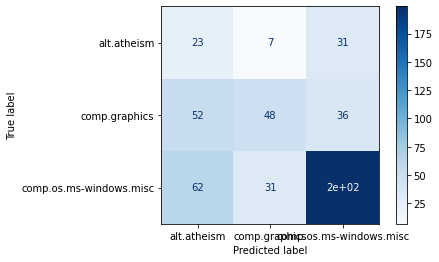

In [ ]:
plot_confusion_matrix(classifier, m_X_test.toarray(), y_test, display_labels=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware'], cmap=plt.cm.Blues)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         NEG       0.17      0.38      0.23        61
         NEU       0.56      0.35      0.43       136
         POS       0.75      0.68      0.71       292

    accuracy                           0.55       489
   macro avg       0.49      0.47      0.46       489
weighted avg       0.62      0.55      0.58       489



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy : ", accuracy)

Accuracy :  0.5521472392638037


In [ ]:
classifier.predict(m_X_test.toarray())

array(['POS', 'POS', 'POS', 'POS', 'POS', 'NEU', 'POS', 'NEG', 'POS',
       'NEG', 'NEU', 'POS', 'NEU', 'NEG', 'POS', 'NEU', 'POS', 'NEG',
       'POS', 'POS', 'POS', 'POS', 'NEU', 'NEG', 'POS', 'POS', 'POS',
       'POS', 'POS', 'NEG', 'NEG', 'POS', 'NEU', 'POS', 'POS', 'NEG',
       'NEG', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'NEG', 'POS',
       'NEG', 'POS', 'NEG', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'POS',
       'NEU', 'POS', 'POS', 'POS', 'POS', 'POS', 'POS', 'POS', 'NEU',
       'POS', 'POS', 'NEG', 'NEU', 'NEU', 'POS', 'POS', 'POS', 'NEU',
       'NEG', 'NEG', 'POS', 'NEG', 'POS', 'NEG', 'POS', 'NEU', 'NEU',
       'POS', 'NEU', 'POS', 'POS', 'POS', 'POS', 'POS', 'POS', 'POS',
       'NEU', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'NEU', 'NEG',
       'NEU', 'POS', 'POS', 'POS', 'POS', 'NEG', 'NEU', 'POS', 'POS',
       'POS', 'NEG', 'POS', 'POS', 'NEG', 'POS', 'POS', 'POS', 'NEU',
       'POS', 'NEG', 'NEG', 'NEG', 'POS', 'POS', 'POS', 'POS', 'POS',
       'NEU', 'NEU',

**Third Model**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
                     ('binarizer', Binarizer()),
                     ('clf', MultinomialNB())
                    ])

scores = cross_val_score(text_clf, X_train, y_train, cv=10)
print(scores)

[0.71428571 0.67346939 0.70068027 0.70748299 0.68707483 0.70068027
 0.68707483 0.70547945 0.65753425 0.75342466]


In [ ]:
text_clf.fit(X_train,y_train)
print(text_clf)
predicted = text_clf.predict(X_test)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [ ]:
print("Accuracy:" + str(sum(scores)/10))
predicted = cross_val_predict(text_clf, X_train, y_train, cv=10)
print("\n Confusion matrix:")
print(confusion_matrix(y_train,predicted))
print(classification_report(y_train,predicted))

Accuracy:0.6987186655484112

 Confusion matrix:
[[ 41  15 121]
 [  5 127 273]
 [  5  23 857]]
              precision    recall  f1-score   support

         NEG       0.80      0.23      0.36       177
         NEU       0.77      0.31      0.45       405
         POS       0.69      0.97      0.80       885

    accuracy                           0.70      1467
   macro avg       0.75      0.50      0.54      1467
weighted avg       0.72      0.70      0.65      1467



**Fourth Model**

In [ ]:
train_count = vectorizer.fit_transform(X_train)

In [ ]:
clf = MultinomialNB().fit(train_count,y_train)

test_counts = vectorizer.transform(X_test)
predicted = clf.predict(test_counts)
for text,label in list(zip(y_test,predicted))[:10]:
  if label == 1:
    print(text[:100],"pos")
  else:
    print(text[:100],"neg")

POS neg
POS neg
POS neg
POS neg
POS neg
NEU neg
POS neg
POS neg
POS neg
NEG neg


In [ ]:
print("\n Confusion matrix:")
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))


 Confusion matrix:
[[ 20  10  31]
 [  5  61  70]
 [  3  18 271]]
              precision    recall  f1-score   support

         NEG       0.71      0.33      0.45        61
         NEU       0.69      0.45      0.54       136
         POS       0.73      0.93      0.82       292

    accuracy                           0.72       489
   macro avg       0.71      0.57      0.60       489
weighted avg       0.71      0.72      0.69       489



**Fifth Model**

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer(min_df=10,max_df=0.5)),
                     ('binarizer', Binarizer()),
                     ('clf', MultinomialNB())
                    ])
text_clf.fit(X_train,y_train)
print(text_clf)
predicted = text_clf.predict(X_test)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.5,
                                 max_features=None, min_df=10,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('binarizer', Binarizer(copy=True, threshold=0.0)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)


In [ ]:
print("\n Confusion matrix:")
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))


 Confusion matrix:
[[ 19  12  30]
 [  8  75  53]
 [ 15  27 250]]
              precision    recall  f1-score   support

         NEG       0.45      0.31      0.37        61
         NEU       0.66      0.55      0.60       136
         POS       0.75      0.86      0.80       292

    accuracy                           0.70       489
   macro avg       0.62      0.57      0.59       489
weighted avg       0.69      0.70      0.69       489



#**3. Name Entity Recognition**

**Import NLP libraries**

In [ ]:
import spacy # entitiy labeling library
!python -m spacy download en_core_web_md

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
# ML library
!pip install sklearn_crfsuite
import sklearn_crfsuite
from sklearn_crfsuite import metrics
from sklearn_crfsuite import scorers
# ML evaluation
!pip install seqeval
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score

     |████████████████████████████████| 747kB 7.9MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=c12fbe4ce12440c0cffd44d37561a314b94623d3f7d3617851a10985de06bf61
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [ ]:
from tqdm import tqdm

In [ ]:
def loadSpacy():
    nlp = spacy.load("en_core_web_md")
    return nlp

In [ ]:
review.head()

,Unnamed: 0,ReviewNo,SentenceNo,ReviewSentence,compound,neg,neu,pos,ReviewSentenceCl,compoundCl,negCl,neuCl,posCl,ReviewSentenceWd,compoundWd,negWd,neuWd,posWd,score,scoreCl,scoreWd,Label
1,1,34,1,Everything Perfect,0.5719,0.000,0.213,0.787,Everything Perfect,0.5719,0.0,0.213,0.787,"['Everything', 'Perfect']",2.859500e-01,0.000000,0.500000,5.000000e-01,1.000,1.0,1.000000,POS
2,2,85,1,"Can't beat the location, due to Covid prices w...",-0.3346,0.154,0.846,0.000,Ca beat location due Covid price never low,0.2057,0.0,0.794,0.206,"['Ca', 'beat', 'location', 'due', 'Covid', 'pr...",-4.268750e-03,0.015625,0.000047,0.000000e+00,0.692,1.0,-0.015578,POS
3,3,86,1,"Good location, good service , good staff",0.8271,0.000,0.256,0.744,Good location good service good staff,0.8271,0.0,0.256,0.744,"['Good', 'location', 'good', 'service', 'good'...",1.651500e-02,0.000000,0.176389,3.750000e-02,1.000,1.0,0.213889,POS
4,4,87,1,"Despite a quite compact room, I like this hote...",0.8341,0.000,0.819,0.181,Despite quite compact room I like hotel thanks...,0.8207,0.0,0.720,0.280,"['Despite', 'quite', 'compact', 'room', 'I', '...",1.102609e-10,0.000000,0.040064,2.503654e-10,1.000,1.0,0.040064,POS
5,5,88,1,Close to Emporium and BTS,0.0000,0.000,1.000,0.000,Close Emporium BTS,0.0000,0.0,1.000,0.000,"['Close', 'Emporium', 'BTS']",0.000000e+00,0.000000,0.500000,0.000000e+00,1.000,1.0,0.500000,NEU


In [ ]:
def getPOS(onlyReview):
    dataList = []
    for data in onlyReview:
        pos = nltk.word_tokenize(data)
        print(nltk.pos_tag(pos))
        dataList.append((nltk.pos_tag(pos)))
    return dataList

In [ ]:
dataset = review['ReviewSentenceCl']
entities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TPA/category.csv')

In [ ]:
dataset.isna().sum()

0

In [ ]:
dataset = dataset.to_list()

In [ ]:
entities = entities.replace(np.nan, 0)
entities = entities.to_dict()

In [ ]:
def getFormatProduct(productBody,productName):
    dfProduct = []
    dictKey = {}
    for body in tqdm(productBody):
        entityList = {}
        for cate,product in productName.items():
            for prod in product:
                prodCap = True if prod in body else False
                prodLow = True if prod.lower() in body else False
                if prodCap or prodLow:
                    start = 0
                    lenLocat = 0
                    i = 0
                    # startEndList = []
                    while i < 1:
                        try:
                            prod = prod if prodCap is True else prod.lower()
                            stLocation = body[start:len(body)].index(prod)
                            edLocation = stLocation + len(prod)
                            if lenLocat < stLocation:
                                lenLocat = stLocation
                                start = edLocation
                                # startEndList.append((stLocation,edLocation))
                                if prod not in entityList:
                                    entityList[prod] = [(stLocation,edLocation,cate)]
                                    continue
                                else:
                                    entityList[prod].append((stLocation,edLocation,cate))
                                    continue
                        except ValueError:
                            break

                        i += 1
        if entityList != {}:
            dictKey[body] = entityList

    return dictKey

In [ ]:
entityList = {}
for key,val in entities.items():
    for k,i in val.items():
        if i != 0:
            i = i.strip()
            if key not in entityList:
                entityList[key] = [i]
                continue
            else:
                entityList[key].append(i)
                continue

In [ ]:
reviewDetail = getFormatProduct(dataset,entityList)

100%|██████████| 1956/1956 [00:00<00:00, 12996.55it/s]


In [ ]:
nlp = spacy.load('en_core_web_md')

In [ ]:
def createFormat(sentenceList,sentence,productName,word,pos,iob,numSentence):
    # sentence, word, pos, tag IOB
    wordCap = [(True,productName[product],word) if word == product else False if word.lower() == product else False for product in productName]
    wordCapCheck = [i for i in wordCap if i is not False]
    if wordCapCheck != []:
        for words in wordCapCheck:
            iob = 'B-'+words[1]
            sentenceList.append({'Sentence':"S: "+str(numSentence),"Word":word,"POS":pos,"IOB":iob})
            # break
    else:
        sentenceList.append({'Sentence':"S: "+str(numSentence),"Word":word,"POS":pos,"IOB":iob})
        # break
    return word,pos,iob

In [ ]:
def useSpacy(nlp,productList,productName,typeName):
    sent = []
    if typeName == 'detail':
        numSentence = 0
        for sentence,prodName in tqdm(productList.items()):
            sentenceList = []
            getter = []
            entAndCate = {}
            for key,i in prodName.items():
                entAndCate[key] = i[0][2]
            doc = nlp(sentence)
            for token in doc:
                # print(token.text, token.pos_, token.ent_iob_)
                itemFormat = createFormat(sentenceList, sentence, entAndCate, token.text, token.pos_, token.ent_iob_, numSentence)
                getter.append(tuple(itemFormat))
            numSentence += 1
            sent.append(getter)
    return sent

In [ ]:
sentences = useSpacy(nlp,reviewDetail,entityList,"detail") #newProductDetail,

100%|██████████| 967/967 [00:41<00:00, 23.42it/s]


In [ ]:
sentences[0]

[('Our', 'DET', 'O'),
 ('room', 'NOUN', 'O'),
 ('view', 'VERB', 'B-Sightseeing'),
 ('corner', 'NOUN', 'O'),
 ('slight', 'ADJ', 'O'),
 ('view', 'NOUN', 'B-Sightseeing'),
 ('pool', 'NOUN', 'O'),
 ('looked', 'VERB', 'O'),
 ('bathroom', 'NOUN', 'O')]

In [ ]:
print("Shuffle data")
np.random.shuffle(sentences)
amountOfList = int(len(sentences) * 0.8)
train_sents = sentences[:amountOfList]
test_sents = sentences[amountOfList:]

Shuffle data


In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

In [ ]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

In [ ]:
X_train = [sent2features(s) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

X_test = [sent2features(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

In [ ]:
def trainModel(X_train, y_train):
    crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
    all_possible_transitions=True
    )
    crf.fit(X_train, y_train)
    return crf

def evaluationModel(model,X_test,y_test):

    labels = list(model.classes_)
    labels.remove('O')
    labels
    y_pred = model.predict(X_test)
    metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)
    sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
    )
    print(metrics.flat_classification_report(
        y_test, y_pred, labels=sorted_labels, digits=3
    ))

    print(classification_report(y_test, y_pred))


In [ ]:
ner = trainModel(X_train,y_train)

In [ ]:
def testModel(crf,X_te,y_te):

    Predict = cross_val_predict(estimator=crf, X=X_te, y=y_te, cv=5)
    Predict = crf.predict(X_te)

    return Predict

def evaluateModel(y_te,Predict):
    
    acc = accuracy_score(y_te, Predict)
    print('Accuracy:',acc)

    class_report = classification_report(y_te, Predict)
    print(class_report)

    print('=='*20)

Predict = testModel(ner,X_test,y_test) # X_te,y_te

evaluateModel(y_test,Predict)


print('Done')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Accuracy: 0.9507692307692308
              precision    recall  f1-score   support

  Facilities       1.00      0.96      0.98        23
     Parking       1.00      0.77      0.87        13
       Price       1.00      0.80      0.89        15
   Resturant       1.00      0.87      0.93        54
        Room       1.00      0.88      0.94        78
 Sightseeing       1.00      1.00      1.00        50
       Staff       1.00      0.94      0.97        52
           _       0.84      0.62      0.71       106
       other       1.00      0.67      0.80         9

   micro avg       0.96      0.83      0.89       400
   macro avg       0.98      0.83      0.90       400
weighted avg       0.96      0.83      0.88       400

Done


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
# Test 1 Sentiment Analysis for get POS NEU NEG
# Test 2 NER for get Category in this text

In [ ]:
# This Shuffle for test data
# np.random.shuffle(dataset)
# data = dataset[:15]

In [ ]:
#data

#**Prediction by Sentiment Analysis and NER**

In [ ]:
mlData = vectorizer.transform(dataset)
resultML = clf.predict(mlData)

In [ ]:
resultML

array(['POS', 'POS', 'POS', ..., 'POS', 'POS', 'POS'], dtype='<U3')

In [ ]:
nerDataset = []
for d in dataset: # data
  sents = []
  doc = nlp(d.lower())
  for token in doc:
      sents.append((token.text,token.pos_))
  print(sents)
  nerDataset.append(sents)

[('everything', 'PRON'), ('perfect', 'ADJ')]
[('ca', 'VERB'), ('beat', 'VERB'), ('location', 'NOUN'), ('due', 'ADJ'), ('covid', 'ADJ'), ('price', 'NOUN'), ('never', 'ADV'), ('low', 'ADJ')]
[('good', 'ADJ'), ('location', 'PROPN'), ('good', 'PROPN'), ('service', 'NOUN'), ('good', 'ADJ'), ('staff', 'NOUN')]
[('despite', 'SCONJ'), ('quite', 'ADJ'), ('compact', 'ADJ'), ('room', 'NOUN'), ('i', 'PRON'), ('like', 'VERB'), ('hotel', 'NOUN'), ('thanks', 'NOUN'), ('location', 'NOUN'), ('near', 'SCONJ'), ('bts', 'PROPN'), ('opposite', 'ADV'), ('leading', 'VERB'), ('shopping', 'NOUN'), ('mall', 'PROPN'), ('also', 'ADV'), ('another', 'DET'), ('side', 'NOUN'), ('enough', 'ADV'), ('make', 'VERB'), ('life', 'NOUN'), ('easy', 'ADJ'), ('shopping', 'VERB'), ('various', 'ADJ'), ('dining', 'NOUN'), ('option', 'NOUN')]
[('close', 'ADJ'), ('emporium', 'NOUN'), ('bts', 'PROPN')]
[('hotel', 'PROPN'), ('perfect', 'PROPN'), ('location', 'PROPN'), ('disappointed', 'VERB'), ('customer', 'NOUN'), ('service', 'NOUN')

In [ ]:
nerData = [sent2features(s) for s in nerDataset]

In [ ]:
resultNER = ner.predict(nerData)

In [ ]:
resultNER

[['O', 'O'],
 ['O', 'O', 'B-Sightseeing', 'O', 'O', 'B-Price', 'O', 'O'],
 ['O', 'B-Sightseeing', 'O', 'O', 'O', 'B-Staff'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Sightseeing',
  'O',
  'B',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O'],
 ['O', 'O', 'B-Sightseeing', 'O', 'O', 'O'],
 ['O', 'B-Sightseeing', 'O', 'O', 'B-Resturant'],
 ['O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'B-Room',
  'O',
  'O',
  'O',
  'B-Staff',
  'B-Staff',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'B-Sightseeing', 'O', 'O', 'B-Sightseeing'],
 ['O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O'],
 ['O', 'O', 'B-Staff', 'O'],
 ['O', 'O', 'O', 'B-Sightseeing'],
 ['O',
  'B',
  'O',
  'O',
  'O',
  'O',
  'B-Sightseeing',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-Parking',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', '

In [ ]:
# จัด format ว่า sentence นี้มี category อะไรอยู่บ้าง ในรูปแบบ DataFrame
# หาว่า มี category ไหนถูกพูดถึงมากที่สุด ทั้งด้าน NEG และ POS ครับ

In [ ]:
sentimentAnalysis = list(resultML)
dataset = pd.DataFrame(dataset)
dataset.rename(columns={"ReviewSentenceCl": "Review"},inplace=True)
dataset['SentimentAnalysis'] = sentimentAnalysis

In [ ]:
dataset.head()

,Review,SentimentAnalysis,Category
0,Everything Perfect,POS,0
1,Ca beat location due Covid price never low,POS,"Sightseeing, Price"
2,Good location good service good staff,POS,"Sightseeing, Staff"
3,Despite quite compact room I like hotel thanks...,POS,Sightseeing
4,Close Emporium BTS,POS,0


In [ ]:
dataset.rename(columns={0: "Review"},inplace=True)

In [ ]:
dataset.head()

,Review,SentimentAnalysis,Category
0,Everything Perfect,POS,0
1,Ca beat location due Covid price never low,POS,"Sightseeing, Price"
2,Good location good service good staff,POS,"Sightseeing, Staff"
3,Despite quite compact room I like hotel thanks...,POS,Sightseeing
4,Close Emporium BTS,POS,0


In [ ]:
categories = list(resultNER)

In [ ]:
mainCategory = []
for category in categories:
  category = [i for i in category if i != 'O' and i != 'B' and i != 'I']
  cateList = []
  for i in category:
    i = i.split('-')[1]
    if i not in cateList:
      cateList.append(i)
  mainCategory.append(', '.join(cateList))

In [ ]:
mainCategory

['',
 'Sightseeing, Price',
 'Sightseeing, Staff',
 'Sightseeing',
 '',
 'Sightseeing',
 'Sightseeing, Resturant',
 '',
 '',
 'Room, Staff',
 'Sightseeing',
 '',
 '',
 'Staff',
 'Sightseeing',
 'Sightseeing, Parking',
 '',
 '',
 '',
 '',
 'Sightseeing',
 '',
 '',
 'Staff',
 'Resturant',
 '',
 'Staff',
 'Sightseeing',
 '',
 'Room',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'Parking',
 'Facilities',
 '',
 'Staff',
 'Sightseeing, Price',
 '',
 'Staff, Resturant',
 '',
 '',
 'Staff',
 '',
 '',
 '',
 '',
 '',
 '',
 'Sightseeing',
 'Resturant',
 '',
 '',
 '',
 '',
 'Price',
 '',
 '',
 '',
 'Sightseeing',
 'Resturant',
 'Sightseeing',
 '',
 '',
 'Sightseeing, Staff',
 '',
 '',
 'Staff, Sightseeing',
 '',
 'Staff',
 '',
 '',
 'Room',
 'Room',
 '',
 'Room',
 '',
 'Sightseeing',
 '',
 'Sightseeing',
 'Staff',
 'Staff',
 'Sightseeing, Staff',
 '',
 '',
 '',
 'Room',
 'Staff',
 '',
 'Room',
 '',
 '',
 'Staff',
 '',
 '',
 'Sightseeing',
 '',
 '',
 'Sightseeing',
 'Facilities',
 '',
 '',
 '',
 '',
 '

In [ ]:
dataset['Category'] = mainCategory

In [ ]:
dataset.head(10)

,Review,SentimentAnalysis,Category
0,Everything Perfect,POS,
1,Ca beat location due Covid price never low,POS,"Sightseeing, Price"
2,Good location good service good staff,POS,"Sightseeing, Staff"
3,Despite quite compact room I like hotel thanks...,POS,Sightseeing
4,Close Emporium BTS,POS,
5,hotel perfect location disappointed customer s...,POS,Sightseeing
6,Best location Easy get food,POS,"Sightseeing, Resturant"
7,Train near,NEU,
8,All thing good hotel quite small,POS,
9,Can constantly hear opening closing door pipe ...,POS,"Room, Staff"


In [ ]:
dataset.shape

(1956, 3)

In [ ]:
datasetDropCateSpace = dataset
datasetDropCateSpace.loc[datasetDropCateSpace['Category'] == '', 'Category'] = 0

In [ ]:
# datasetDropCateSpace.drop(0)
datasetDropCateSpace = datasetDropCateSpace[datasetDropCateSpace.Category != 0]

In [ ]:
datasetDropCateSpace.head(10)

,Review,SentimentAnalysis,Category
1,Ca beat location due Covid price never low,POS,"Sightseeing, Price"
2,Good location good service good staff,POS,"Sightseeing, Staff"
3,Despite quite compact room I like hotel thanks...,POS,Sightseeing
5,hotel perfect location disappointed customer s...,POS,Sightseeing
6,Best location Easy get food,POS,"Sightseeing, Resturant"
9,Can constantly hear opening closing door pipe ...,POS,"Room, Staff"
10,Only good thing location many option location,POS,Sightseeing
13,Location convenient staff great,POS,Staff
14,Value money good location,POS,Sightseeing
15,This first time stay central bangkok area conv...,NEU,"Sightseeing, Parking"


In [ ]:
datasetDropCateSpace.shape

(907, 3)

In [ ]:
# หาว่า มี category ไหนถูกพูดถึงมากที่สุด ทั้งด้าน NEG และ POS ครับ

#**Plot Graph**

In [ ]:
mainCategory2 = []
for category in categories:
  category = [i for i in category if i != 'O' and i != 'B' and i != 'I']
  cateList = []
  for i in category:
    i = i.split('-')[1]
    if i not in cateList:
      cateList.append(i)
  for k in cateList:
    mainCategory2.append(k)


In [ ]:
plotCategory = list(set(mainCategory2))
dfPlotCategory = pd.DataFrame(plotCategory)

In [ ]:
dfPlotCategory.rename(columns={0: "Category"},inplace=True)

In [ ]:
dfPlotCategory

,Category
0,Price
1,other
2,Parking
3,Resturant
4,Staff
5,Facilities
6,Sightseeing
7,Room


In [ ]:
categoryName = ['Parking','Room','other','Price','Sightseeing','Facilities','Staff','Resturant']
def countCategory(categoryType):
  count = len([i for i in mainCategory2 if i == categoryType])
  return count
totalCategory = []
for cate in categoryName:
  count = countCategory(cate)
  totalCategory.append(count)

totalCategory

[42, 228, 24, 64, 237, 95, 227, 235]

In [ ]:
dfPlotCategory['Count'] = totalCategory

In [ ]:
dfPlotCategory

,Category,Count
0,Price,42
1,other,228
2,Parking,24
3,Resturant,64
4,Staff,237
5,Facilities,95
6,Sightseeing,227
7,Room,235


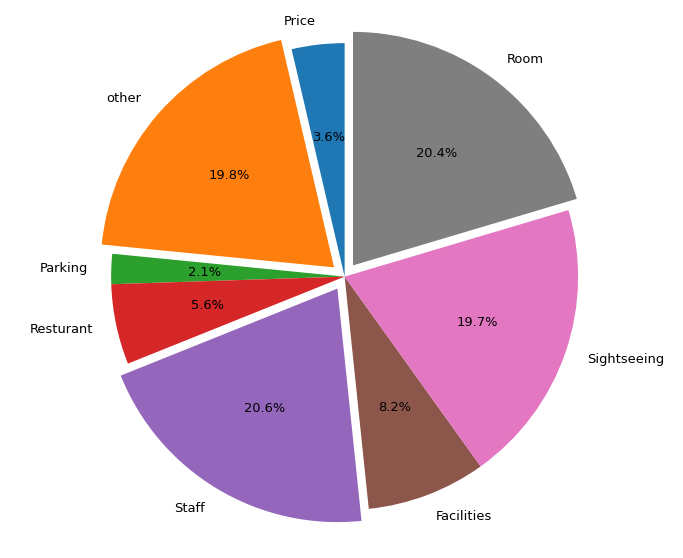

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = dfPlotCategory['Category']
sizes = dfPlotCategory['Count']
explode = (0, 0.06, 0, 0,0.06,0,0,0.06)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 13})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
dfPlotCategory

,Category,Count
0,Price,42
1,other,228
2,Parking,24
3,Resturant,64
4,Staff,237
5,Facilities,95
6,Sightseeing,227
7,Room,235


In [ ]:
reviewRateCate = datasetDropCateSpace.to_dict('index')

In [ ]:
reviewRateCate

{1: {'Category': 'Sightseeing, Price',
  'Review': 'Ca beat location due Covid price never low',
  'SentimentAnalysis': 'POS'},
 2: {'Category': 'Sightseeing, Staff',
  'Review': 'Good location good service good staff',
  'SentimentAnalysis': 'POS'},
 3: {'Category': 'Sightseeing',
  'Review': 'Despite quite compact room I like hotel thanks location near BTS opposite leading shopping mall also another side enough make life easy shopping various dining option',
  'SentimentAnalysis': 'POS'},
 5: {'Category': 'Sightseeing',
  'Review': 'hotel perfect location disappointed customer service',
  'SentimentAnalysis': 'POS'},
 6: {'Category': 'Sightseeing, Resturant',
  'Review': 'Best location Easy get food',
  'SentimentAnalysis': 'POS'},
 9: {'Category': 'Room, Staff',
  'Review': 'Can constantly hear opening closing door pipe water running housekeeping staff lovely front office inflexible no warmth',
  'SentimentAnalysis': 'POS'},
 10: {'Category': 'Sightseeing',
  'Review': 'Only good th

In [ ]:
testKey = list(reviewRateCate.keys())[0]
testVal = list(reviewRateCate.values())[0]
testDict = {testKey:testVal}

In [ ]:
testDict

{1: {'Category': 'Sightseeing, Price',
  'Review': 'Ca beat location due Covid price never low',
  'SentimentAnalysis': 'POS'}}

In [ ]:
plotCateSent = {'Parking':[0,0,0],'Room':[0,0,0],'other':[0,0,0],'Price':[0,0,0],'Sightseeing':[0,0,0]
                ,'Facilities':[0,0,0],'Staff':[0,0,0],'Resturant':[0,0,0]}
for key,num in reviewRateCate.items():
  cateIn = num['Category'].split()
  for cate in cateIn:
    cate = cate.replace(',','')
    if cate in categoryName:
      # print(plotCateSent)
      posN, negN, neuN = plotCateSent[cate]
      if num['SentimentAnalysis'] == 'POS':
        plotCateSent[cate] = [posN+1,negN+0,neuN+0]
      elif num['SentimentAnalysis'] == 'NEG':
        plotCateSent[cate] = [posN+0,negN+1,neuN+0]
      elif num['SentimentAnalysis'] == 'NEU':
        plotCateSent[cate] = [posN+0,negN+0,neuN+1]

In [ ]:
plotCateSent

{'Facilities': [55, 12, 28],
 'Parking': [21, 5, 16],
 'Price': [47, 7, 10],
 'Resturant': [184, 17, 34],
 'Room': [147, 39, 42],
 'Sightseeing': [205, 6, 26],
 'Staff': [192, 24, 11],
 'other': [18, 1, 5]}

In [ ]:
dfPlotCateSent = pd.DataFrame(plotCateSent)

In [ ]:
dfPlotCateSent

,Parking,Room,other,Price,Sightseeing,Facilities,Staff,Resturant
0,21,147,18,47,205,55,192,184
1,5,39,1,7,6,12,24,17
2,16,42,5,10,26,28,11,34


In [ ]:
dfPlotCateSent = dfPlotCateSent.T

In [ ]:
dfPlotCateSent.rename(columns={0:"POS",1:"NEG",2:"NEU"},inplace=True)

In [ ]:
dfPlotCateSent

,POS,NEG,NEU
Parking,21,5,16
Room,147,39,42
other,18,1,5
Price,47,7,10
Sightseeing,205,6,26
Facilities,55,12,28
Staff,192,24,11
Resturant,184,17,34


Text(0, 0.5, 'Count')

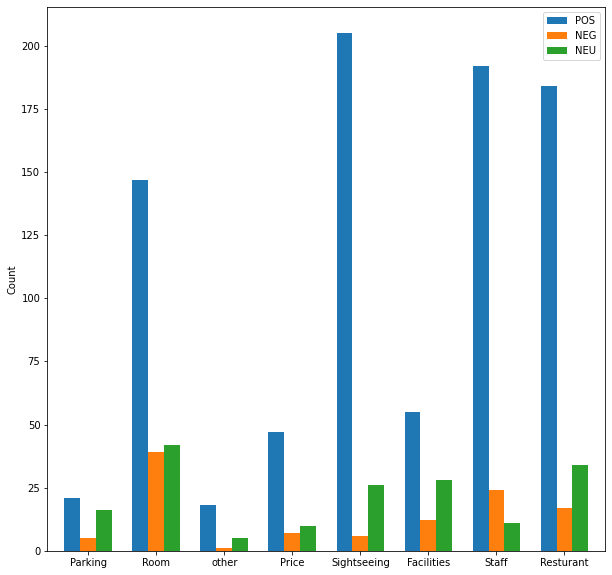

In [ ]:
ax = dfPlotCateSent.plot.bar(figsize=(10,10),rot=0,width=0.7)
ax.set_ylabel("Count")

In [ ]:
reviewTopTen = review

In [ ]:
reviewTopTen

,Unnamed: 0,ReviewNo,SentenceNo,ReviewSentence,compound,neg,neu,pos,ReviewSentenceCl,compoundCl,negCl,neuCl,posCl,ReviewSentenceWd,compoundWd,negWd,neuWd,posWd,score,scoreCl,scoreWd,Label
1,1,34,1,Everything Perfect,0.5719,0.000,0.213,0.787,Everything Perfect,0.5719,0.000,0.213,0.787,"['Everything', 'Perfect']",2.859500e-01,0.000000,0.500000,5.000000e-01,1.000,1.000,1.000000,POS
2,2,85,1,"Can't beat the location, due to Covid prices w...",-0.3346,0.154,0.846,0.000,Ca beat location due Covid price never low,0.2057,0.000,0.794,0.206,"['Ca', 'beat', 'location', 'due', 'Covid', 'pr...",-4.268750e-03,0.015625,0.000047,0.000000e+00,0.692,1.000,-0.015578,POS
3,3,86,1,"Good location, good service , good staff",0.8271,0.000,0.256,0.744,Good location good service good staff,0.8271,0.000,0.256,0.744,"['Good', 'location', 'good', 'service', 'good'...",1.651500e-02,0.000000,0.176389,3.750000e-02,1.000,1.000,0.213889,POS
4,4,87,1,"Despite a quite compact room, I like this hote...",0.8341,0.000,0.819,0.181,Despite quite compact room I like hotel thanks...,0.8207,0.000,0.720,0.280,"['Despite', 'quite', 'compact', 'room', 'I', '...",1.102609e-10,0.000000,0.040064,2.503654e-10,1.000,1.000,0.040064,POS
5,5,88,1,Close to Emporium and BTS,0.0000,0.000,1.000,0.000,Close Emporium BTS,0.0000,0.000,1.000,0.000,"['Close', 'Emporium', 'BTS']",0.000000e+00,0.000000,0.500000,0.000000e+00,1.000,1.000,0.500000,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,1952,1834,1,"The location is perfect, loads of good restaur...",0.7650,0.000,0.577,0.423,The location perfect load good restaurant bar ...,0.7650,0.000,0.476,0.524,"['The', 'location', 'perfect', 'load', 'good',...",3.365436e-05,0.000000,0.018235,7.595486e-05,1.000,1.000,0.018311,POS
1953,1953,1834,2,"The hotel is pretty well kept, rooms are clean...",0.7906,0.000,0.500,0.500,The hotel pretty well kept room clean modern,0.7906,0.000,0.385,0.615,"['The', 'hotel', 'pretty', 'well', 'kept', 'ro...",1.026806e-03,0.000000,0.125086,2.555745e-03,1.000,1.000,0.127641,POS
1954,1954,1834,3,Jumping in the pool on a hot day was heaven.,0.5106,0.000,0.708,0.292,Jumping pool hot day heaven,0.5106,0.000,0.548,0.452,"['Jumping', 'pool', 'hot', 'day', 'heaven']",1.021200e-01,0.000000,0.017708,2.000000e-01,1.000,1.000,0.217708,POS
1955,1955,1834,4,The hotel food is not so good compared to the ...,-0.1602,0.135,0.758,0.107,The hotel food not good compared quality fresh...,-0.0015,0.174,0.652,0.174,"['The', 'hotel', 'food', 'not', 'good', 'compa...",4.240021e-08,0.000000,0.091000,1.247059e-07,0.730,0.652,0.091000,NEU


In [ ]:
posReviewTopten = reviewTopTen.nlargest(10, 'posCl')
posReviewTopten = posReviewTopten[['ReviewSentenceCl','posCl']]
posReviewTopten.rename(columns={"ReviewSentenceCl":"Review","posCl":"POS Score"},inplace=True)

In [ ]:
posReviewTopten

,Review,POS Score
63,Comfortable clean,1.000
368,I want thank kindness,1.000
746,Thank,1.000
798,Love,1.000
952,Recommended,1.000
1063,Best best,1.000
641,Enjoy fantastic location value,0.902
1171,Staff friendly helpful good,0.899
1933,Nice clean comfortable room,0.898
1433,Staff friendly competent helpful,0.892


In [ ]:
negReviewTopten = reviewTopTen.nlargest(10, 'negCl')
negReviewTopten = negReviewTopten[['ReviewSentenceCl','negCl']]
negReviewTopten.rename(columns={"ReviewSentenceCl":"Review","negCl":"NEG Score"},inplace=True)
negReviewTopten

,Review,NEG Score
443,I think stupid mistake,0.853
752,night catastrophic,0.762
1067,Was disappointed,0.756
743,I requested failed despite promising,0.735
934,Bad not cool enough,0.732
257,No issue,0.688
553,Could avoid,0.688
940,Worst stay ever,0.672
1459,The staff could not welcoming courteous helpful,0.650
1409,The Breakfast poor,0.608


In [ ]:
neuReviewTopten = reviewTopTen.nlargest(10, 'neuCl')
neuReviewTopten = neuReviewTopten[['ReviewSentenceCl','neuCl']]
neuReviewTopten.rename(columns={"ReviewSentenceCl":"Review","neuCl":"NEU Score"},inplace=True)
neuReviewTopten

,Review,NEU Score
5,Close Emporium BTS,1.0
8,Train near,1.0
22,A big department store located far hotel,1.0
25,Breakfast includes many food choice temporary ...,1.0
31,They also quiet,1.0
32,The window not let noise outside,1.0
35,However construction site nearby might closed ...,1.0
38,First time stayed return,1.0
40,near shop restaurant,1.0
44,The facility swimming pool small really squeezed,1.0
